# ロジスティック回帰 (Logistic Regression)

回帰分析 (Regression)は、ある目的変数YYの値を、パラメーターθθによって重み付けされた説明変数XXによって予測する方法でした。  
$Y$の予測値である仮定関数$hθ(x)$は以下のようになります。

$
h_\theta(x) \\
= \theta_{0}x_0 + \theta_{1}x_1 + \theta_{2}x_2 + \cdots + \theta_{n}x_n  \\
= \Theta^T X \\
$

この方法を分類にも使用可能にするのが、ロジスティック回帰です。

通常の回帰分析だと、仮定関数$h_θ(x)$は連続した値を取り、特別範囲が定まっていません。  
ただ、分類においては、少なくとも予測値の値を$0 \leq h_θ(x) \leq 1$にしたい。

そのために登場するのが、ロジスティック関数、別名シグモイド関数 (Sigmoid Function)です。

$g(z) = \frac{1}{1 + e^{-z}}$



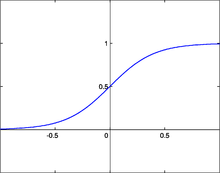

In [2]:
url='https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/SigmoidFunction.png/220px-SigmoidFunction.png'
from IPython.display import Image
Image(url, width=250, height=200)

この関数を使えば、zzにどんな値を入れても、$g(z)$は必ず$0 \leq g(z) \leq 1$になります。

ロジスティック回帰では、単純に回帰分析の仮定関数をこの$z$に放り込みます。

$h_\theta(x) = \frac{1}{1 + e^{- \Theta^T X}}$

これがロジスティック回帰における新しい仮定関数で、

$
h_θ(x) \geq 0.5 \ の場合 \ y=1 \\
h_θ(x) \leq 0.5 \ の場合 \ y=0 \\
$

というように分類判定をします。

## 目的関数 (Cost Function)

ロジスティック回帰では、例えば0か1のカテゴリーに分類する課題の場合、$y=0 \ or \ 1$の2値しかとりません。  
そのため、$h_\theta(x)$が$y$の値と一致していれば目的関数$J(\theta)$が最小になり、$h_\theta(x)$が$y$の値と不一致ならばが最大になるような関数を$J(θ)$に使う必要があります。

これを満たす関数が$-log$です。



/usr/lib/python3.5/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


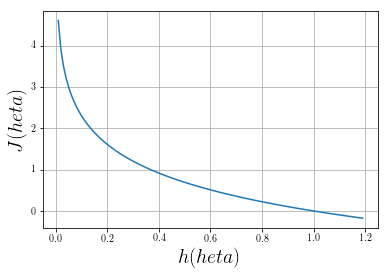

In [26]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# 便宜的に領域を決めます。
X = np.arange(0,1.2,0.01)
# 値を計算します。
Y = (-1) * np.log(X)
# 描写
plt.rc('text', usetex=True)
plt.xlabel("$h(\theta)$", fontsize=20)
plt.ylabel("$J(\theta)$", fontsize=20)
plt.grid()
plt.plot(X,Y)

$y=1$の場合

$
J(\theta) = −log(h_\theta(x)) \\
$

$y=0$の場合

$
J(\theta) = −log(1 − h_\theta(x)) \\
$

とすれば、どちらも$h_\theta(x)=y$のとき、log内の括弧の中の値が1になり、$J(\theta)=0$となります。  
逆にyがもう一方の値だったとき、$J(\theta) → \infty$となります。

　この2つをまとめると、以下のように目的関数を表現できます。これにより、場合分けがいらなくなります。
$J(\theta) = − \frac{1}{m}[ \displaystyle\sum_{i=1}^{m}y^{(i)} log(h_\theta(x^{(i)})) + (1 − y^{(i)}) log(1 − h_{\theta}(x^{(i)}))]$

これで目的関数$J(\theta)$ができました。

これが最小値を取るパラメーター$\theta$を求めるために、最急降下法を使用します。

## 最急降下法 (Gradient Descent)

$
\theta_j := \theta_j - \alpha\frac{\partial}{\partial\theta_j}J(\theta_j) \\
\theta_j - \alpha\displaystyle{\sum_{i=1}^{m}}(h_\theta(x^{(i)}) - y^{(i)}) \cdot x^{(i)}_j \\ 
$

これは、単回帰分析や重回帰分析と変わりません。  
ロジスティック回帰の場合は、$hθ(x)$がロジスティック関数である点が唯一の違いです。


## 複数クラスへの分類 (Multiclass Classification)

### one vs all

その名の通り、全てのカテゴリー $(j=0,1, \cdots j=0,1, \cdots)$それぞれについて、  
そのカテゴリー vs その他のカテゴリーと分類するロジスティック回帰モデル$h_\theta^{(i)}(x)$を作ります。  
カテゴリーが$n$個あれば、モデルも$n$個できます$(n \geq 3n \geq 3)$。

それぞれのモデルは、
 
$h^{(i)}_{\theta}(x) = P(y=i \ | \ x;θ)$

というように、$\theta$によってパラメーターづけられたインプット$x$に対して、$y=i$となる条件付き確率を返します。  
新たなインプット$x_{new}$が与えられたとき、それが属するカテゴリーは、$h_\theta^{(i)}(x_{new})$が最大となるカテゴリー$i$となります。


# 過学習 (Overfitting)

回帰分析では、仮定関数$h_\theta(x)$は必ずしも直線である必要はありません。  
説明変数$x$の次数を増やしていけば、データを曲線でフィットすることができます。  
これを、多項回帰 (Polynomial Regression)といいます。

ロジスティック回帰でも同様です。データを分類する決定境界 (decision boundary)は、直線のみならず曲線になることができます。

多項回帰を使うと、手持ちのデータセット (training set)を100%近い精度で説明するモデルを作ることができます。  
ただ、そのモデルはあまりにもtraining setの説明に特化しているため、新しいデータセット (test set)には全く役に立たないかもしれません。  
これが、過学習です。

多項回帰が問題なわけではなく、線形回帰だけだとモデルの精度が悪いことがあります。  
フィッティングが悪すぎる場合、未学習 (Underfitting)と呼ばれます。

過学習でも未学習でもない、汎用性があってかつ精度の高いモデルを作るためには、余計な説明変数を減らしたり、必要な説明変数を増やしたりする他、正則化 (Regularization)という方法があります。


# 正則化 (Regularization)

パラメーター$\theta$の値を十分小さくしてしまえば、説明変数$x$がどんな多項式であっても、  
その説明変数の予測値$hθ(x)$への影響を小さくできるから過学習しにくくなる、という考えです。

そのために、正則化パラメーター (Regularization Parameter) $\lambda$ を目的関数$J(\theta)$に導入します。

$J(\theta) = \frac{1}{2m}[\displaystyle{\sum_{i=1}^{m}}(h_\theta(x^{(i)}) - y^{(i)})^2 + \lambda \displaystyle{\sum_{j=1}^{n}} \theta_j^2]$

2つ目の$\Sigma$の項が目的関数$J(\theta)$に入ることにより、$\theta$の値を大きく取ると目的関数が最小値に近づけないように設計しています。

注目したいのは、この2つ目の$\Sigma$の項の範囲が$j=1, \cdots ,nj=1, \cdots ,n$であること、つまり$\theta_0$には$\lambda$がかからないことです。$\theta_0$は説明変数$x$の重み付けをしない、切片項なので、正則化しなくてよい。

この事実は、目的関数$J(\theta)$の最小値を求めるアルゴリズムである最急降下法にも影響してきます。  
$\theta_0$のアップデートのときは、正規化パラメーターが介入しない。

正則化された最急降下法

$
\theta_0 := \theta_0 - \alpha \frac{1}{m} \displaystyle{\sum_{i=1}^{m}}(h_\theta(x^{(i)}) - y^{(i)}) \cdot x^{(i)}_0 \\
\theta_j := \theta_j - \alpha [ \frac{1}{m} \displaystyle{\sum_{i=1}^{m}}(h_\theta(x^{(i)}) - y^{(i)}) \cdot x^{(i)}_j - frac{\lambda}{m}\theta_j] \\
$

このように、$j \geq 1$のときは正則化された項がアップデートに影響します。  
収束まで上記アルゴリズムを全ての$j=0,1,...,n$で同時に繰り返すのは、今までと同様です。

注意点
$\lambda$を大きくしすぎると (λ=106など)、$\theta_0$以外の全ての$\theta$が、限りなく0に近づきます。  
すると、$h_\theta(x)→ \theta_0$となり、$h_\theta(x)$はどんなインプット$x$に対しても同じ値$\theta_0$しか返さないため、アンダーフィットになってしまいます。